In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
import pandas as pd
from tqdm import tqdm 

## Important Function

In [3]:
class Data:
    def __init__(self, array_list):
        self.array_list = array_list

    def save(self, filename):
        with open(filename, 'wb') as f:
            pickle.dump(self.array_list, f)

    @classmethod
    def load(cls, filename):
        with open(filename, 'rb') as f:
            array_list = pickle.load(f)
        return cls(array_list)

## Plain MD

In [ ]:
plain_md_path = '../Plain_MD/analysis'


population_loaded = Data.load(f"{plain_md_path}/population_data/population_8_conform.pkl").array_list
population_mean = population_loaded[0]
population_std = population_loaded[1]

plain_md_population_mean = population_mean
plain_md_population_std = population_std
plain_md_population_mean.shape

(8, 196095)

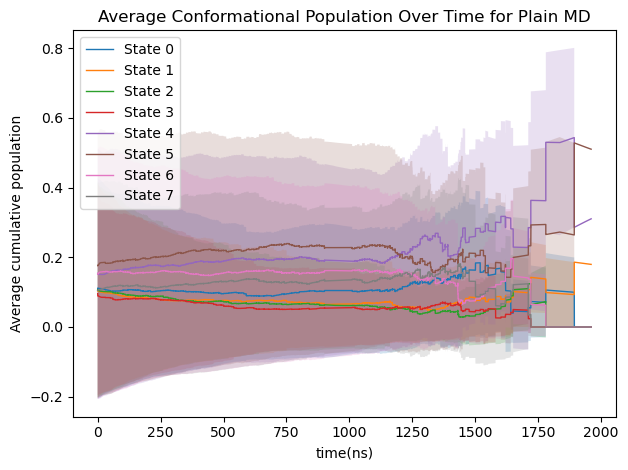

In [20]:
conform_num = 8
T = plain_md_population_mean.shape[1]
x = np.arange(T)
dt_in_ns = 0.01

for i in range(conform_num):
    mean = plain_md_population_mean[i]
    std = plain_md_population_std[i]

    plt.plot(x * dt_in_ns, mean, label=f"State {i}", linewidth=1)
    plt.fill_between(x * dt_in_ns, mean - std, mean + std, alpha=0.2)

plt.xlabel("time(ns)")
plt.ylabel("Average cumulative population")
plt.title("Average Conformational Population Over Time for Plain MD")
plt.legend(loc='best')
plt.tight_layout()
plt.show()


## EE

In [22]:
ee_path = '../EE/analysis'


population_loaded = Data.load(f"{ee_path}/population_data/population_8_conform.pkl").array_list
population_mean = population_loaded[0]
population_std = population_loaded[1]

ee_population_mean = population_mean
ee_population_std = population_std
ee_population_mean.shape

(4, 8, 37002)

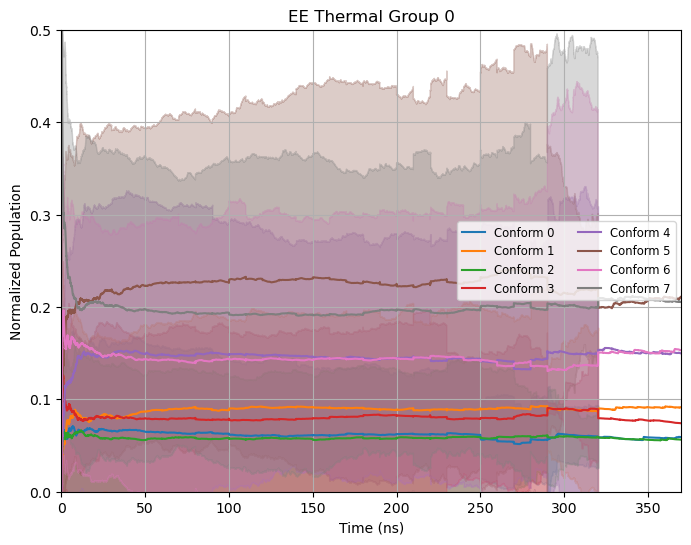

In [24]:
dt_in_ns = 0.01  # 10 ps = 0.01 ns

conform_num = 8
thermal_num = 1 # only plot the state 0 

for thermal in range(thermal_num):
    time = np.arange(ee_population_mean.shape[2])
    time_ns = time * dt_in_ns  # Convert to nanoseconds

    plt.figure(figsize=(8, 6))

    for conform in range(conform_num):
        mean = ee_population_mean[thermal, conform, :]
        std = ee_population_std[thermal, conform, :]

        # Plot and capture the line object to get the color
        line, = plt.plot(time_ns, mean, label=f'Conform {conform}')
        plt.fill_between(time_ns, mean - std, mean + std, alpha=0.3, color=line.get_color())
        
    plt.ylim(0, 0.5)
    plt.xlim(time_ns[0], time_ns[-1])  # Optional but precise
    plt.xlabel("Time (ns)")
    plt.ylabel("Normalized Population")
    plt.title(f"EE Thermal Group {thermal}")
    plt.legend(loc='right',fontsize='small', ncol=2)
    plt.grid(True)
    #plt.tight_layout()
    plt.show()


## HREX

In [26]:
hrex_path = '../HREX/analysis'


population_loaded = Data.load(f"{hrex_path}/population_data/population_8_conform.pkl").array_list
population_mean = population_loaded[0]
population_std = population_loaded[1]

hrex_population_mean = population_mean
hrex_population_std = population_std
hrex_population_mean.shape

(6, 8, 600030)

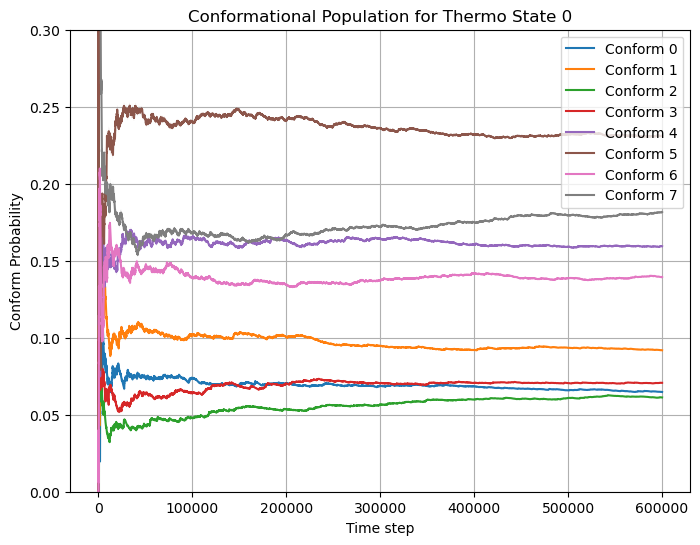

In [28]:
thermo_num = 1
conform_num = 8

for thermo in range(thermo_num):  # Loop over 6 thermodynamic states
    plt.figure(figsize=(8, 6))
    
    for conform in range(conform_num):  # Loop over 8 conformational states
        y = hrex_population_mean[thermo, conform, :]
        yerr = hrex_population_std[thermo, conform, :]
        x = np.arange(len(y))  # or use actual time values

        plt.plot(x, y, label=f'Conform {conform}')
        plt.fill_between(x, y - yerr, y + yerr, alpha=0.2)

    plt.title(f'Conformational Population for Thermo State {thermo}')
    plt.xlabel('Time step')
    plt.ylabel('Conform Probability')
    plt.ylim(0, 0.3)
    plt.grid(True)
    plt.legend(loc="best")
    #plt.tight_layout()
    plt.show()


## REDs

In [33]:
reds_path = '../REDs/analysis'


population_loaded = Data.load(f"{reds_path}/population_data/population_8_conform.pkl").array_list
population_mean = population_loaded[0]
#population_std = population_loaded[1]

reds_population_mean = population_mean
#hrex_population_std = population_std
reds_population_mean.shape

(3, 8, 212509)

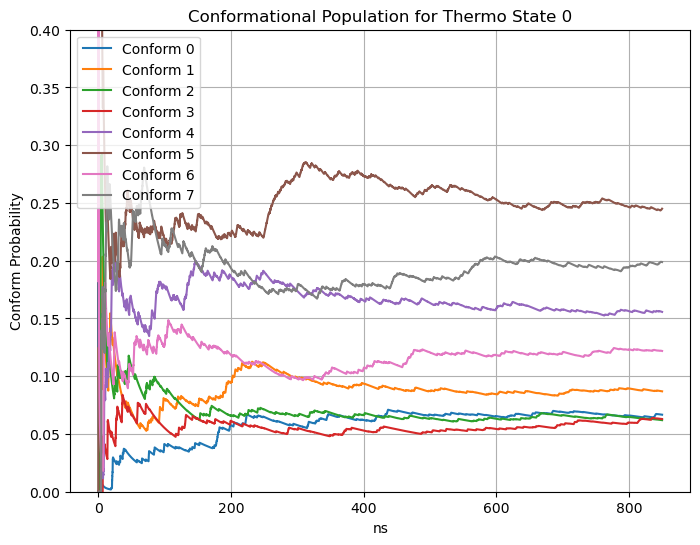

In [34]:
thermo_num = 1
conform_num = 8
dt_in_ns = 0.004 # 4ps

for thermo in range(thermo_num):  # Loop over 6 thermodynamic states
    plt.figure(figsize=(8, 6))
    
    for conform in range(conform_num):  # Loop over 8 conformational states
        y = reds_population_mean[thermo, conform, :]
        x = np.arange(len(y))  # or use actual time values

        plt.plot(x * dt_in_ns, y, label=f'Conform {conform}')

    plt.title(f'Conformational Population for Thermo State {thermo}')
    plt.xlabel('ns')
    plt.ylabel('Conform Probability')
    plt.ylim(0, 0.4)
    plt.grid(True)
    plt.legend(loc="best")
    #plt.tight_layout()
    plt.show()


## Combined Plot 

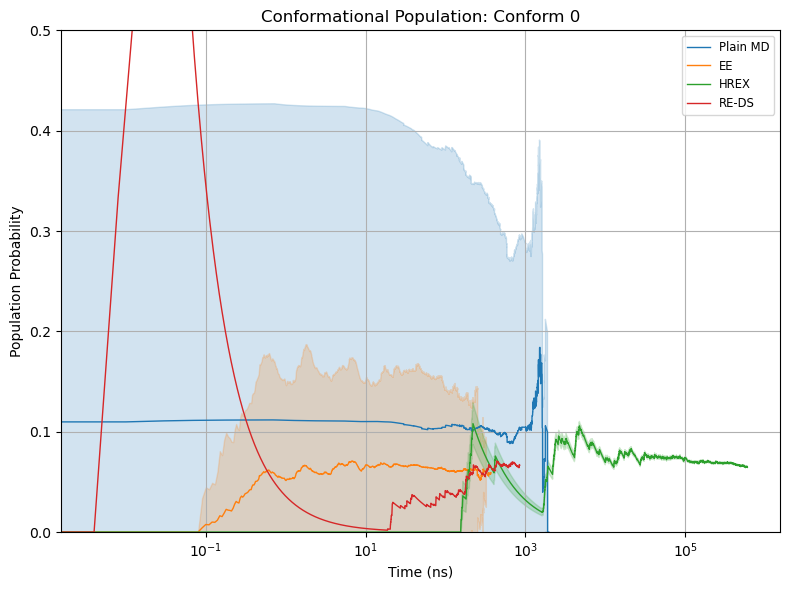

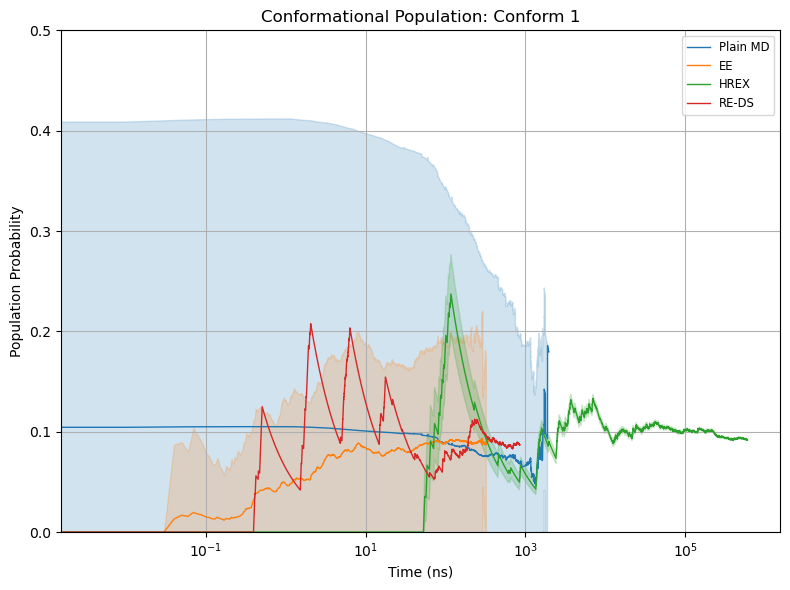

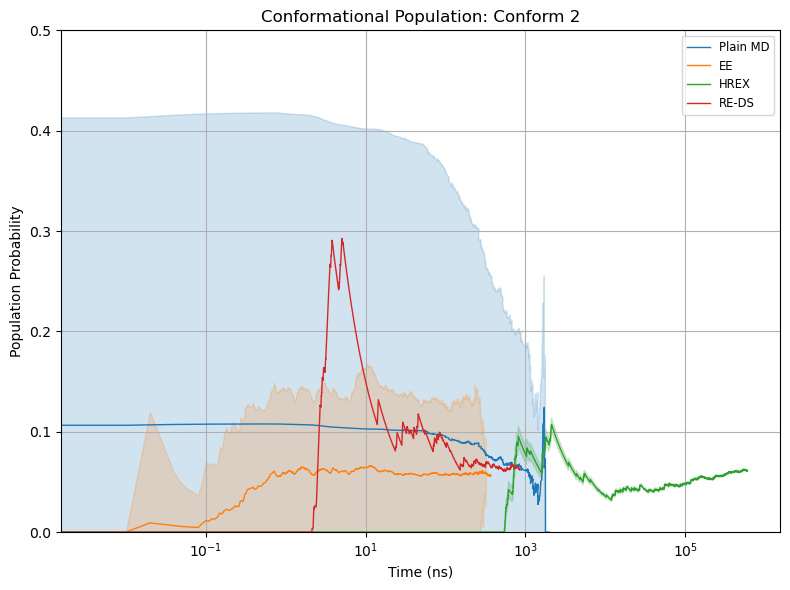

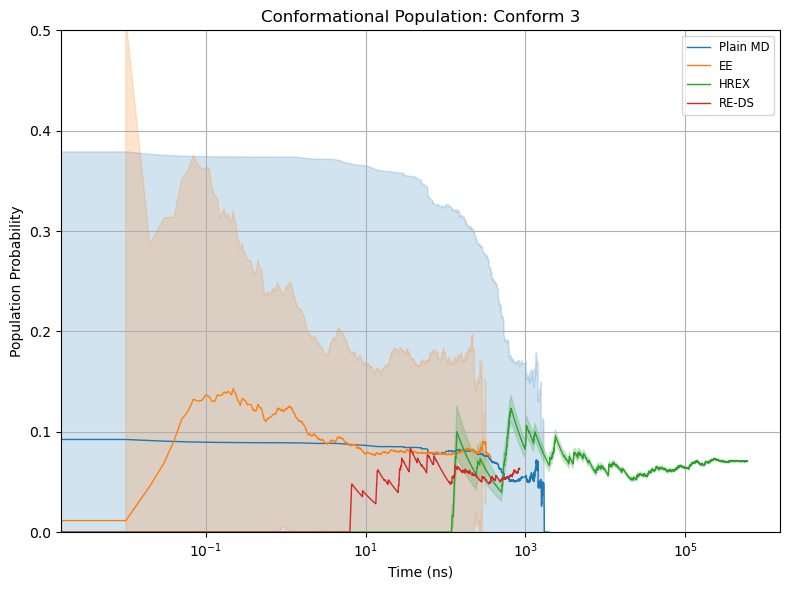

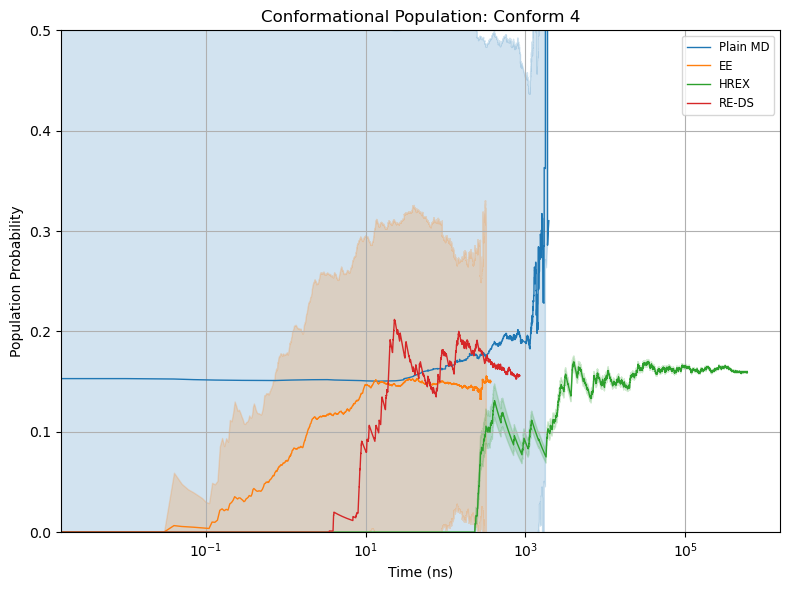

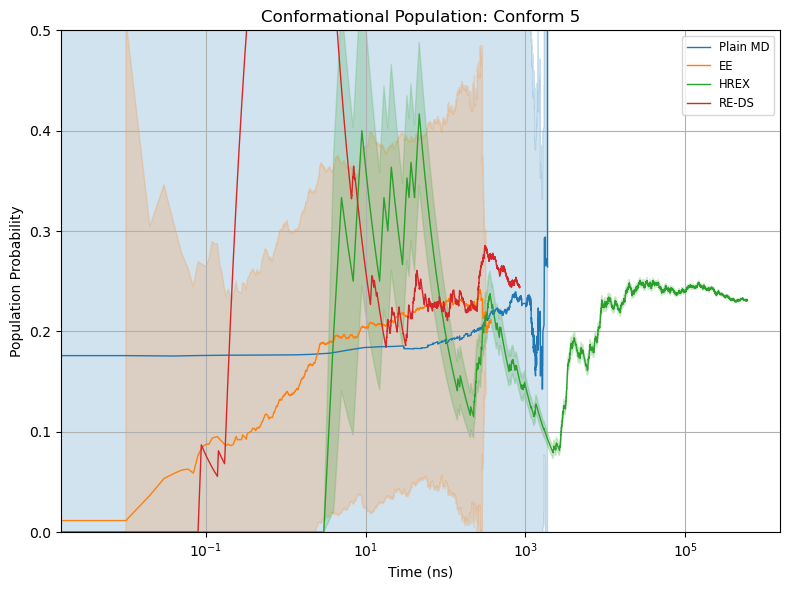

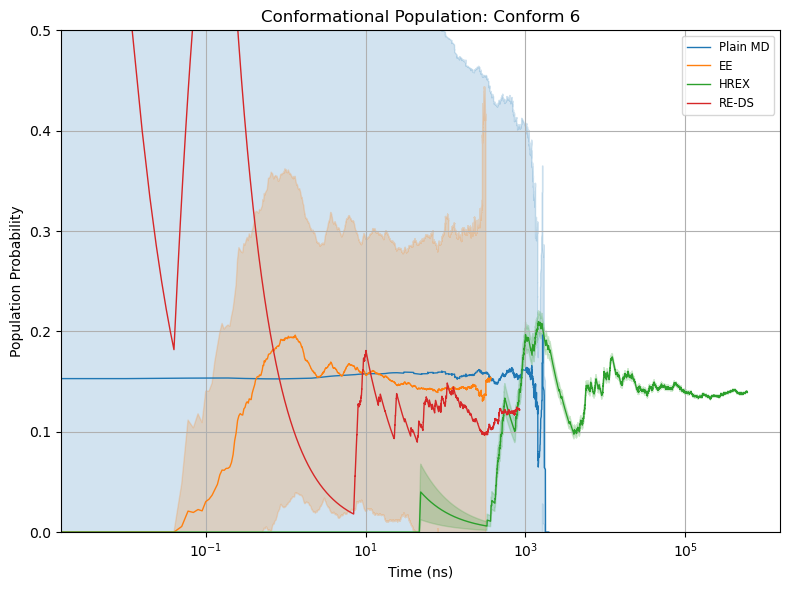

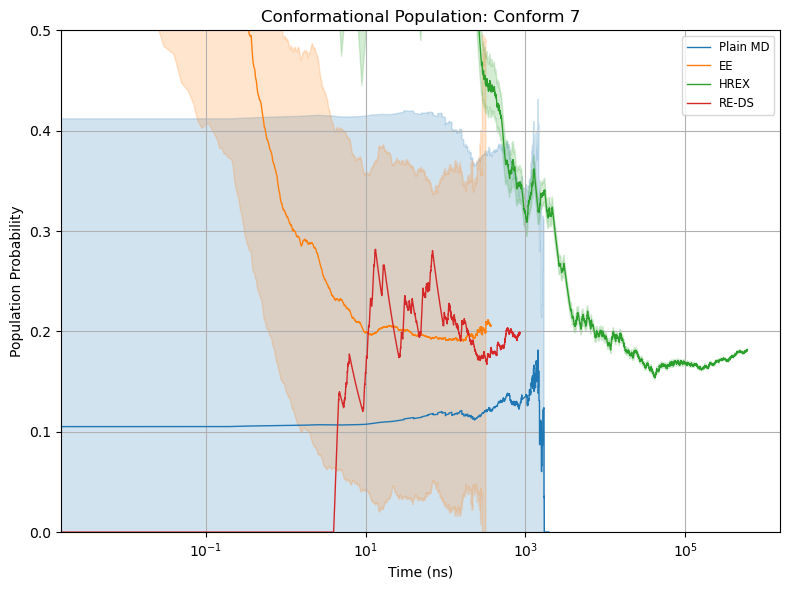

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
conform_num = 8
dt_plain_md = 0.01  # 10 ps
dt_ee = 0.01        # 10 ps
dt_reds = 0.004     # 4 ps

T_plain_md = plain_md_population_mean.shape[1]
T_ee = ee_population_mean.shape[2]
T_hrex = hrex_population_mean.shape[2]
T_reds = reds_population_mean.shape[2]

time_plain_md = np.arange(T_plain_md) * dt_plain_md
time_ee = np.arange(T_ee) * dt_ee
time_hrex = np.arange(T_hrex)
time_reds = np.arange(T_reds) * dt_reds

# Assume thermo index = 0 for EE, HREX, REDS
thermo = 0

for conform in range(conform_num):
    plt.figure(figsize=(8, 6))

    # Plot plain MD
    mean_plain = plain_md_population_mean[conform]
    std_plain = plain_md_population_std[conform]
    line1, = plt.plot(time_plain_md, mean_plain, label="Plain MD", linewidth=1)
    plt.fill_between(time_plain_md, mean_plain - std_plain, mean_plain + std_plain, alpha=0.2, color=line1.get_color())

    # Plot EE
    mean_ee = ee_population_mean[thermo, conform, :]
    std_ee = ee_population_std[thermo, conform, :]
    line2, = plt.plot(time_ee, mean_ee, label="EE", linewidth=1)
    plt.fill_between(time_ee, mean_ee - std_ee, mean_ee + std_ee, alpha=0.2, color=line2.get_color())

    # Plot HREX
    mean_hrex = hrex_population_mean[thermo, conform, :]
    std_hrex = hrex_population_std[thermo, conform, :]
    line3, = plt.plot(time_hrex, mean_hrex, label="HREX", linewidth=1)
    plt.fill_between(time_hrex, mean_hrex - std_hrex, mean_hrex + std_hrex, alpha=0.2, color=line3.get_color())

    # Plot REDS
    mean_reds = reds_population_mean[thermo, conform, :]
    line4, = plt.plot(time_reds, mean_reds, label="RE-DS", linewidth=1)
    # No std deviation assumed for REDS; add if available

    plt.title(f"Conformational Population: Conform {conform}")
    plt.xlabel("Time (ns)")
    plt.xscale('log')
    plt.ylabel("Population Probability")
    plt.ylim(0, 0.5)
    plt.grid(True)
    plt.legend(loc="best", fontsize='small')
    plt.tight_layout()
    plt.show()
